# Analysis of similarity matrix - cosine similarity

In [1]:
import os
curdir = os.getcwd()
os.chdir('../../codes/')
from src.utils import models_to_architecture_mapping
os.chdir(curdir)

In [2]:
import pandas as pd

path = '20240410_1442_similarity_matrix_gradcam_cosine.csv'

df = pd.read_csv(path, index_col=0)
df

,DeiT_S,DeiT_T,DenseNet121,EfficientNet_B3,EfficientNet_B4,ConvNeXtV2_Nano,PyramidViT_V2_B2,MobileNetV3,Swin_T,ResNet18,ResNet50,ResNeXt50,Res2Net50,ViT_B_32
DeiT_S,1.000001,0.672234,0.685558,0.658976,0.414521,0.576475,0.637133,0.701652,0.699979,0.695970,0.688535,0.611446,0.661752,0.521851
DeiT_T,0.672234,1.000001,0.660536,0.631532,0.405301,0.572709,0.600514,0.681791,0.667062,0.682305,0.664865,0.580827,0.629328,0.504400
DenseNet121,0.685558,0.660536,1.000000,0.865322,0.523041,0.664737,0.856033,0.856228,0.844479,0.889521,0.891814,0.788483,0.932089,0.610486
EfficientNet_B3,0.658976,0.631532,0.865322,1.000001,0.501708,0.642608,0.771066,0.833408,0.823649,0.866002,0.876912,0.828854,0.881002,0.585211
EfficientNet_B4,0.414521,0.405301,0.523041,0.501708,1.000001,0.414727,0.463383,0.526252,0.484124,0.516657,0.511236,0.439277,0.511588,0.360751
ConvNeXtV2_Nano,0.576475,0.572709,0.664737,0.642608,0.414727,1.000001,0.594600,0.706094,0.650995,0.704763,0.678865,0.601835,0.630515,0.492131
PyramidViT_V2_B2,0.637133,0.600514,0.856033,0.771066,0.463383,0.594600,1.000000,0.770740,0.797669,0.780042,0.787005,0.694835,0.838650,0.565882
MobileNetV3,0.701652,0.681791,0.856228,0.833408,0.526252,0.706094,0.770740,1.000000,0.825767,0.869510,0.852809,0.758175,0.833628,0.609399
Swin_T,0.699979,0.667062,0.844479,0.823649,0.484124,0.650995,0.797669,0.825767,1.000001,0.858742,0.879195,0.789636,0.814176,0.596510
ResNet18,0.695970,0.682305,0.889521,0.866002,0.516657,0.704763,0.780042,0.869510,0.858742,1.000001,0.912575,0.805075,0.861249,0.609178


## Heatmap

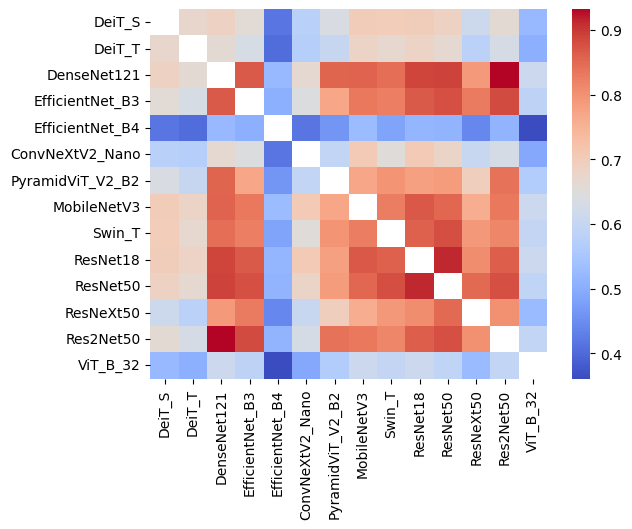

In [3]:
# plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

mask = np.eye(df.shape[0], dtype=bool)
sns.heatmap(df, mask=mask, cmap='coolwarm')
plt.show()

## PCA of distances

In [4]:
# PCA of distances
df_distances = 1 - df
df_distances

,DeiT_S,DeiT_T,DenseNet121,EfficientNet_B3,EfficientNet_B4,ConvNeXtV2_Nano,PyramidViT_V2_B2,MobileNetV3,Swin_T,ResNet18,ResNet50,ResNeXt50,Res2Net50,ViT_B_32
DeiT_S,-7.152557e-07,3.277659e-01,3.144422e-01,3.410245e-01,0.585479,4.235249e-01,3.628675e-01,2.983476e-01,3.000208e-01,3.040301e-01,3.114647e-01,0.388554,3.382481e-01,0.478149
DeiT_T,3.277659e-01,-7.152557e-07,3.394641e-01,3.684680e-01,0.594699,4.272913e-01,3.994857e-01,3.182087e-01,3.329375e-01,3.176950e-01,3.351346e-01,0.419173,3.706716e-01,0.495600
DenseNet121,3.144422e-01,3.394641e-01,-3.576279e-07,1.346784e-01,0.476959,3.352625e-01,1.439668e-01,1.437717e-01,1.555213e-01,1.104795e-01,1.081863e-01,0.211517,6.791079e-02,0.389514
EfficientNet_B3,3.410245e-01,3.684680e-01,1.346784e-01,-7.152557e-07,0.498292,3.573917e-01,2.289339e-01,1.665921e-01,1.763514e-01,1.339982e-01,1.230876e-01,0.171146,1.189982e-01,0.414789
EfficientNet_B4,5.854794e-01,5.946993e-01,4.769589e-01,4.982917e-01,-0.000001,5.852727e-01,5.366172e-01,4.737484e-01,5.158756e-01,4.833435e-01,4.887645e-01,0.560723,4.884121e-01,0.639249
ConvNeXtV2_Nano,4.235249e-01,4.272913e-01,3.352625e-01,3.573917e-01,0.585273,-9.536743e-07,4.053997e-01,2.939056e-01,3.490051e-01,2.952374e-01,3.211347e-01,0.398165,3.694852e-01,0.507869
PyramidViT_V2_B2,3.628675e-01,3.994857e-01,1.439668e-01,2.289339e-01,0.536617,4.053997e-01,-2.384186e-07,2.292596e-01,2.023314e-01,2.199580e-01,2.129952e-01,0.305165,1.613501e-01,0.434118
MobileNetV3,2.983476e-01,3.182087e-01,1.437717e-01,1.665921e-01,0.473748,2.939056e-01,2.292596e-01,-4.768372e-07,1.742331e-01,1.304897e-01,1.471912e-01,0.241825,1.663717e-01,0.390601
Swin_T,3.000208e-01,3.329375e-01,1.555213e-01,1.763514e-01,0.515876,3.490051e-01,2.023314e-01,1.742331e-01,-7.152557e-07,1.412579e-01,1.208050e-01,0.210364,1.858239e-01,0.403490
ResNet18,3.040301e-01,3.176950e-01,1.104795e-01,1.339982e-01,0.483343,2.952374e-01,2.199580e-01,1.304897e-01,1.412579e-01,-8.344650e-07,8.742529e-02,0.194925,1.387507e-01,0.390822


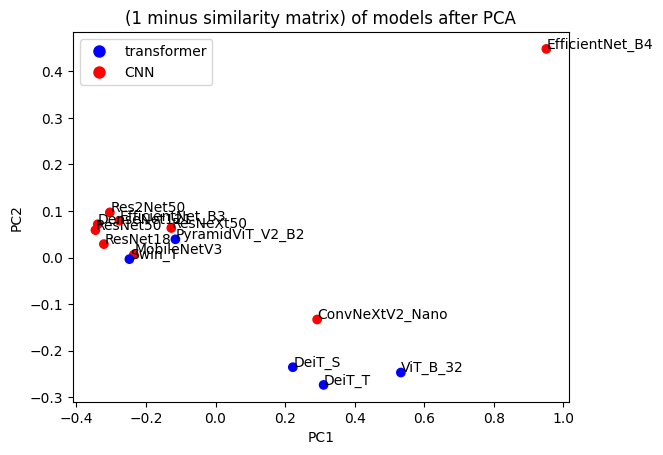

In [5]:
# plot pca of distances
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_distances)
df_distances_pca = pd.DataFrame(pca.transform(df_distances), index=df_distances.index, columns=['PC1', 'PC2'])

df_distances_pca['architecture'] = df_distances_pca.index.map(models_to_architecture_mapping)
plt.scatter(df_distances_pca['PC1'], df_distances_pca['PC2'], c=df_distances_pca['architecture'].map({'transformer': 'blue', 'CNN': 'red'}))
for i, txt in enumerate(df_distances_pca.index):
    plt.annotate(txt, (df_distances_pca['PC1'].iloc[i]+0.001, df_distances_pca['PC2'].iloc[i]+0.001))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('(1 minus similarity matrix) of models after PCA')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='transformer', markerfacecolor='blue', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='CNN', markerfacecolor='red', markersize=10)
])
plt.savefig('pca_cosine.png')
plt.show()

## Clustering

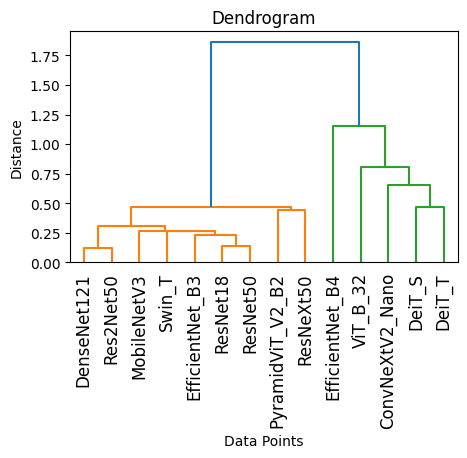

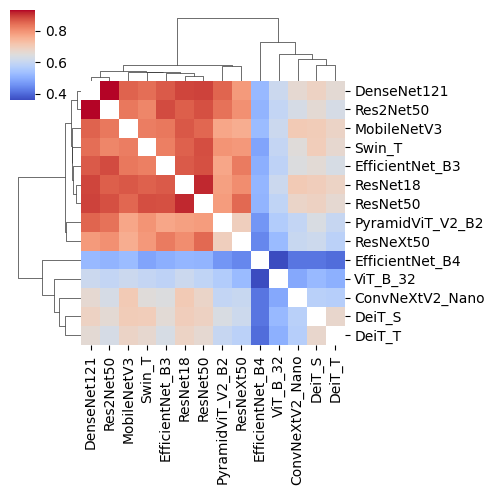

In [5]:
import numpy as np
from scipy.cluster import hierarchy
import seaborn as sns
import matplotlib.pyplot as plt

# Perform hierarchical clustering
linkage_matrix = hierarchy.ward(df)

# Plot the dendrogram
plt.figure(figsize=(5, 3))
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=df.index, leaf_rotation=90)

plt.title('Dendrogram')
plt.ylabel('Distance')
plt.xlabel('Data Points')
plt.show()

# Optionally, you can use seaborn's clustermap to visualize clustered heatmap
sns.clustermap(df, method='ward', cmap='coolwarm', mask=mask, figsize=(5, 5))
plt.show()

t:\win_programs\python_venvs\master-thesis-cnn-vs-transformers\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


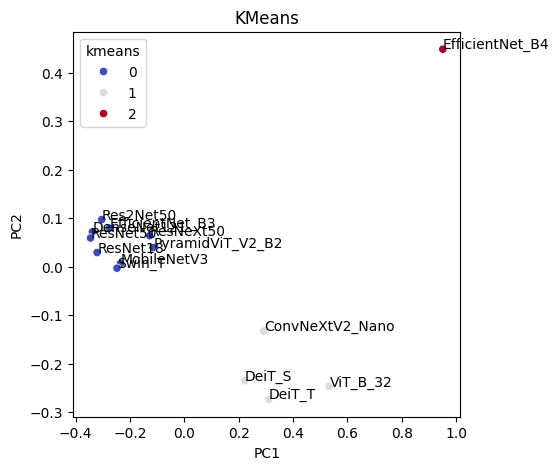

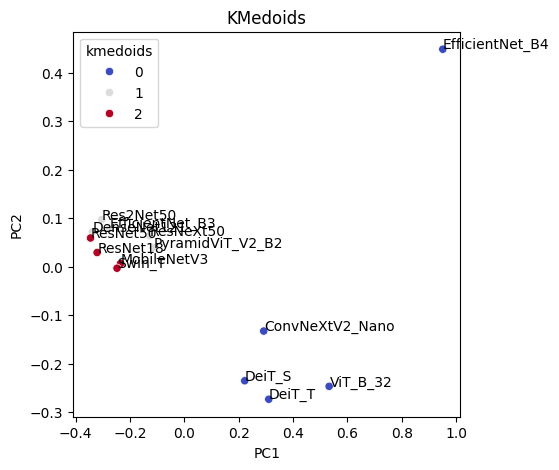

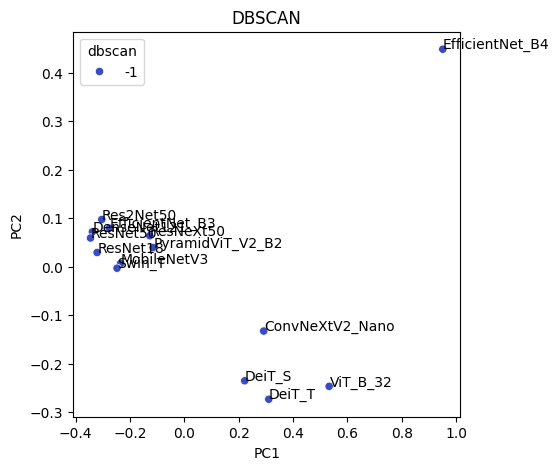

In [6]:
# plot 2d PCA of clustering results: k means, kmedoids and dbscan
from sklearn.cluster import KMeans, DBSCAN

# KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_distances)
df_distances_pca['kmeans'] = kmeans.labels_

# KMedoids
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=3)
kmedoids.fit(df_distances)
df_distances_pca['kmedoids'] = kmedoids.labels_

# DBSCAN
dbscan = DBSCAN(eps=0.1)
dbscan.fit(df_distances)
df_distances_pca['dbscan'] = dbscan.labels_

# plot 2d PCA of clustering results
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df_distances_pca, x='PC1', y='PC2', hue='kmeans', palette='coolwarm')
for i, txt in enumerate(df_distances_pca.index):
    plt.annotate(txt, (df_distances_pca['PC1'].iloc[i]+0.001, df_distances_pca['PC2'].iloc[i]+0.001))
plt.title('KMeans')
plt.show()

plt.figure(figsize=(5, 5))
sns.scatterplot(data=df_distances_pca, x='PC1', y='PC2', hue='kmedoids', palette='coolwarm')
for i, txt in enumerate(df_distances_pca.index):
    plt.annotate(txt, (df_distances_pca['PC1'].iloc[i]+0.001, df_distances_pca['PC2'].iloc[i]+0.001))
plt.title('KMedoids')
plt.show()

plt.figure(figsize=(5, 5))
sns.scatterplot(data=df_distances_pca, x='PC1', y='PC2', hue='dbscan', palette='coolwarm')
for i, txt in enumerate(df_distances_pca.index):
    plt.annotate(txt, (df_distances_pca['PC1'].iloc[i]+0.001, df_distances_pca['PC2'].iloc[i]+0.001))
plt.title('DBSCAN')
plt.show()

# Analysis of similarity matrix - RBF

In [6]:
import pandas as pd

df = pd.read_csv('20240410_1442_similarity_matrix_gradcam_rbf.csv', index_col=0)
df

,DeiT_S,DeiT_T,DenseNet121,EfficientNet_B3,EfficientNet_B4,ConvNeXtV2_Nano,PyramidViT_V2_B2,MobileNetV3,Swin_T,ResNet18,ResNet50,ResNeXt50,Res2Net50,ViT_B_32
DeiT_S,1.000000,0.038086,0.000028,0.000719,3.880754e-04,0.011024,0.000034,0.007277,0.004361,0.005550,0.003306,0.002067,3.177166e-05,0.005257
DeiT_T,0.038086,1.000000,0.000008,0.000427,5.392603e-04,0.012763,0.000007,0.006557,0.002580,0.005388,0.002629,0.001933,1.414337e-06,0.003670
DenseNet121,0.000028,0.000008,1.000000,0.002556,1.155093e-05,0.000038,0.001138,0.000955,0.002276,0.002296,0.002433,0.000426,3.244966e-02,0.000082
EfficientNet_B3,0.000719,0.000427,0.002556,1.000000,1.008950e-04,0.003798,0.000281,0.014014,0.012368,0.031903,0.041933,0.049615,3.288554e-03,0.001384
EfficientNet_B4,0.000388,0.000539,0.000012,0.000101,1.000000e+00,0.001197,0.000002,0.000707,0.000120,0.000579,0.000401,0.000238,7.001010e-08,0.000983
ConvNeXtV2_Nano,0.011024,0.012763,0.000038,0.003798,1.196669e-03,1.000000,0.000124,0.033922,0.010676,0.029655,0.012860,0.010370,7.722009e-06,0.015642
PyramidViT_V2_B2,0.000034,0.000007,0.001138,0.000281,2.391758e-06,0.000124,1.000000,0.000374,0.000944,0.000470,0.000486,0.000111,5.479530e-04,0.000041
MobileNetV3,0.007277,0.006557,0.000955,0.014014,7.070495e-04,0.033922,0.000374,1.000000,0.027051,0.073320,0.044362,0.019952,3.570467e-04,0.009663
Swin_T,0.004361,0.002580,0.002276,0.012368,1.196582e-04,0.010676,0.000944,0.027051,1.000000,0.040801,0.048804,0.025610,4.419567e-04,0.008222
ResNet18,0.005550,0.005388,0.002296,0.031903,5.792833e-04,0.029655,0.000470,0.073320,0.040801,1.000000,0.130432,0.049051,1.275526e-03,0.007356


## Heatmap

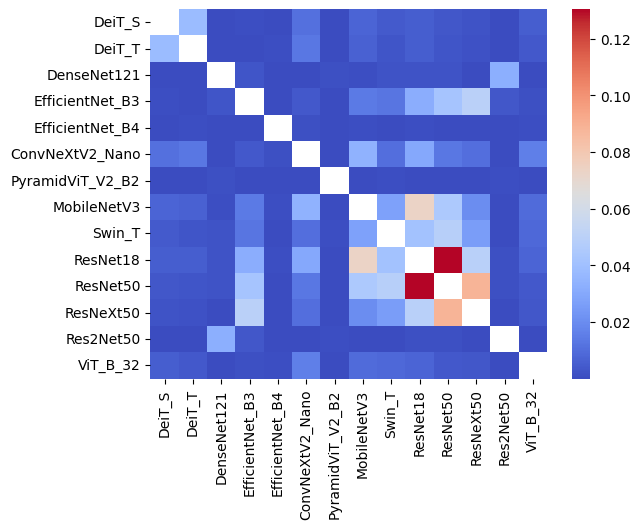

In [7]:
# plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

mask = np.eye(df.shape[0], dtype=bool)
sns.heatmap(df, mask=mask, cmap='coolwarm')
plt.show()

## PCA of distances

In [8]:
# PCA of distances
df_distances = 1 - df
df_distances

,DeiT_S,DeiT_T,DenseNet121,EfficientNet_B3,EfficientNet_B4,ConvNeXtV2_Nano,PyramidViT_V2_B2,MobileNetV3,Swin_T,ResNet18,ResNet50,ResNeXt50,Res2Net50,ViT_B_32
DeiT_S,0.000000,0.961914,0.999972,0.999281,0.999612,0.988976,0.999966,0.992723,0.995639,0.994450,0.996694,0.997933,0.999968,0.994743
DeiT_T,0.961914,0.000000,0.999992,0.999573,0.999461,0.987237,0.999993,0.993443,0.997420,0.994612,0.997371,0.998067,0.999999,0.996330
DenseNet121,0.999972,0.999992,0.000000,0.997444,0.999988,0.999962,0.998862,0.999045,0.997724,0.997704,0.997567,0.999574,0.967550,0.999918
EfficientNet_B3,0.999281,0.999573,0.997444,0.000000,0.999899,0.996202,0.999719,0.985986,0.987632,0.968097,0.958067,0.950385,0.996711,0.998616
EfficientNet_B4,0.999612,0.999461,0.999988,0.999899,0.000000,0.998803,0.999998,0.999293,0.999880,0.999421,0.999599,0.999762,1.000000,0.999017
ConvNeXtV2_Nano,0.988976,0.987237,0.999962,0.996202,0.998803,0.000000,0.999876,0.966078,0.989324,0.970345,0.987140,0.989630,0.999992,0.984358
PyramidViT_V2_B2,0.999966,0.999993,0.998862,0.999719,0.999998,0.999876,0.000000,0.999626,0.999056,0.999530,0.999514,0.999889,0.999452,0.999959
MobileNetV3,0.992723,0.993443,0.999045,0.985986,0.999293,0.966078,0.999626,0.000000,0.972949,0.926680,0.955638,0.980048,0.999643,0.990337
Swin_T,0.995639,0.997420,0.997724,0.987632,0.999880,0.989324,0.999056,0.972949,0.000000,0.959199,0.951196,0.974390,0.999558,0.991778
ResNet18,0.994450,0.994612,0.997704,0.968097,0.999421,0.970345,0.999530,0.926680,0.959199,0.000000,0.869568,0.950949,0.998724,0.992644


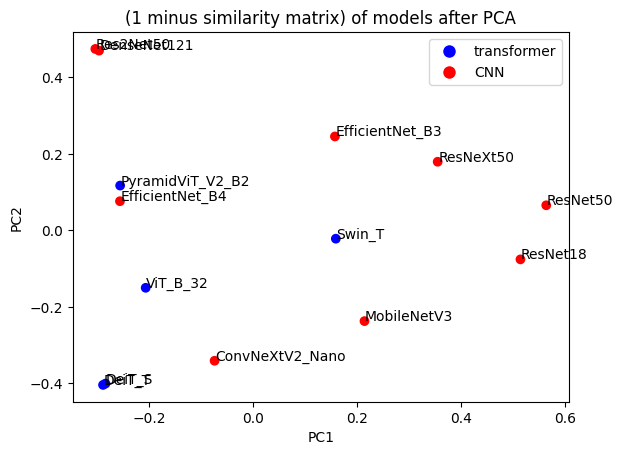

In [9]:
# plot pca of distances
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df_distances)
df_distances_pca = pd.DataFrame(pca.transform(df_distances), index=df_distances.index, columns=['PC1', 'PC2'])

df_distances_pca['architecture'] = df_distances_pca.index.map(models_to_architecture_mapping)
plt.scatter(df_distances_pca['PC1'], df_distances_pca['PC2'], c=df_distances_pca['architecture'].map({'transformer': 'blue', 'CNN': 'red'}))
for i, txt in enumerate(df_distances_pca.index):
    plt.annotate(txt, (df_distances_pca['PC1'].iloc[i]+0.001, df_distances_pca['PC2'].iloc[i]+0.001))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('(1 minus similarity matrix) of models after PCA')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='transformer', markerfacecolor='blue', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='CNN', markerfacecolor='red', markersize=10)
])
plt.savefig('pca_rbf.png')
plt.show()

## Clustering

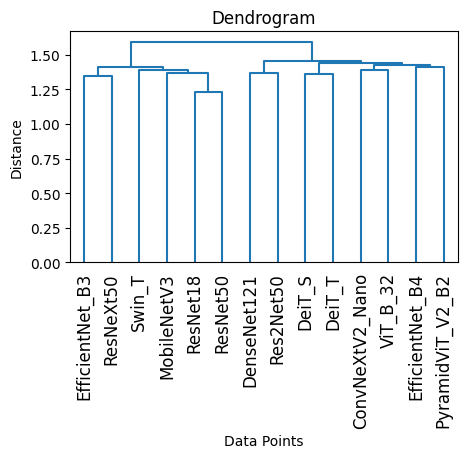

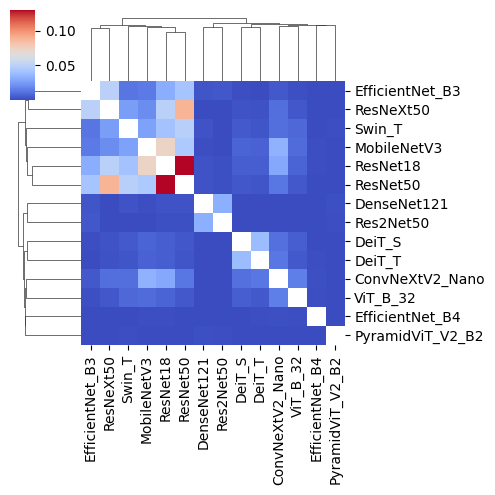

In [11]:
import numpy as np
from scipy.cluster import hierarchy
import seaborn as sns
import matplotlib.pyplot as plt

# Perform hierarchical clustering
linkage_matrix = hierarchy.ward(df)

# Plot the dendrogram
plt.figure(figsize=(5, 3))
dendrogram = hierarchy.dendrogram(linkage_matrix, labels=df.index, leaf_rotation=90)

plt.title('Dendrogram')
plt.ylabel('Distance')
plt.xlabel('Data Points')
plt.show()

# Optionally, you can use seaborn's clustermap to visualize clustered heatmap
sns.clustermap(df, method='ward', cmap='coolwarm', mask=mask, figsize=(5, 5))
plt.show()

t:\win_programs\python_venvs\master-thesis-cnn-vs-transformers\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


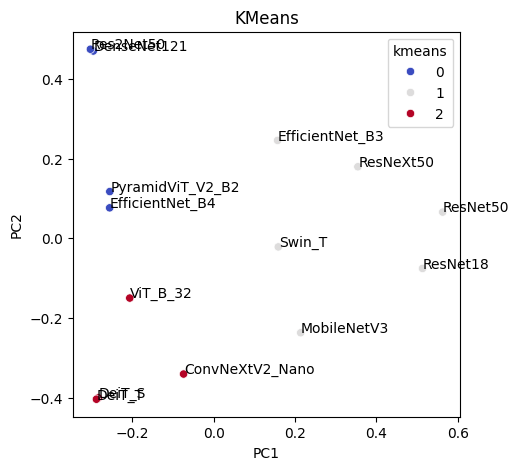

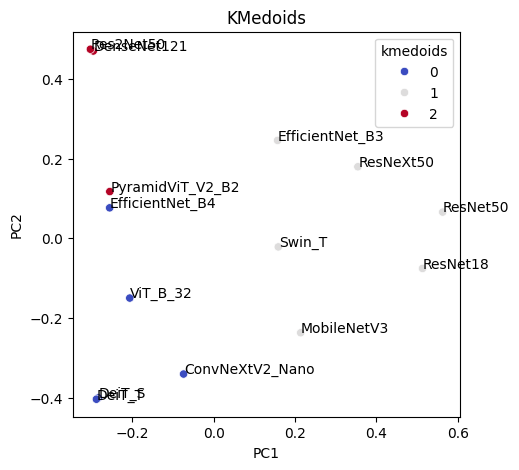

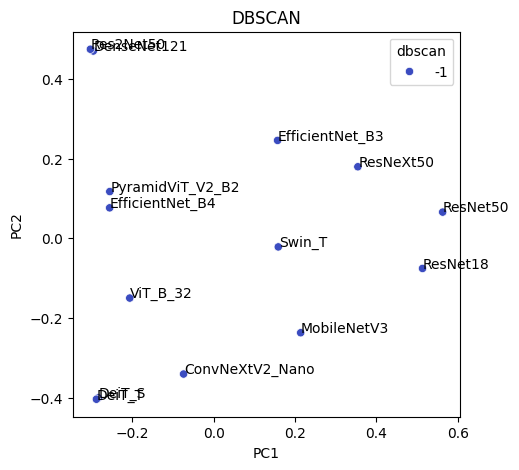

In [12]:
# plot 2d PCA of clustering results: k means, kmedoids and dbscan
from sklearn.cluster import KMeans, DBSCAN

# KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_distances)
df_distances_pca['kmeans'] = kmeans.labels_

# KMedoids
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=3)
kmedoids.fit(df_distances)
df_distances_pca['kmedoids'] = kmedoids.labels_

# DBSCAN
dbscan = DBSCAN(eps=1)
dbscan.fit(df_distances)
df_distances_pca['dbscan'] = dbscan.labels_

# plot 2d PCA of clustering results
plt.figure(figsize=(5, 5))
sns.scatterplot(data=df_distances_pca, x='PC1', y='PC2', hue='kmeans', palette='coolwarm')
for i, txt in enumerate(df_distances_pca.index):
    plt.annotate(txt, (df_distances_pca['PC1'].iloc[i]+0.001, df_distances_pca['PC2'].iloc[i]+0.001))
plt.title('KMeans')
plt.show()

plt.figure(figsize=(5, 5))
sns.scatterplot(data=df_distances_pca, x='PC1', y='PC2', hue='kmedoids', palette='coolwarm')
for i, txt in enumerate(df_distances_pca.index):
    plt.annotate(txt, (df_distances_pca['PC1'].iloc[i]+0.001, df_distances_pca['PC2'].iloc[i]+0.001))
plt.title('KMedoids')
plt.show()

plt.figure(figsize=(5, 5))
sns.scatterplot(data=df_distances_pca, x='PC1', y='PC2', hue='dbscan', palette='coolwarm')
for i, txt in enumerate(df_distances_pca.index):
    plt.annotate(txt, (df_distances_pca['PC1'].iloc[i]+0.001, df_distances_pca['PC2'].iloc[i]+0.001))
plt.title('DBSCAN')
plt.show()